# Testing the LDA on practical examples

In this Python Notebook, the LDA model with 300 topics is tested on practical documents.

First documents are analyzed separately, then most frequent topics are presented and finally we analyze the topics distribution as the similarity between documents.

For the single analyses, I commented briefly the results but it would be better to have the point of view for somenone from the company.

The model with 300 topics has been choosen because it gives the best results:
* with less than 300 topics, the topics are too broad.
* with more than 300 topics, the topics don't make sense.


## load files

In [44]:
import utilities
reload(utilities)
import gensim
import pyprind
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 12.0)
%matplotlib inline
lda = gensim.models.ldamodel.LdaModel.load("fr_lda3008threads")

In [45]:
proof_texts_path = u"proof_texts/"
from os import listdir
from os.path import isfile, join
proof_files = [f for f in listdir(proof_texts_path) if isfile(join(proof_texts_path, f)) and f[0] != '.']
print str(len(proof_files)) + "  files"

10  files


## processing

In [118]:
n_proof_files = len(proof_files)
bar = pyprind.ProgBar(n_proof_files, bar_char='█',width=70)
N = 300
proof_texts_vecs = dict()
raw_vecs = dict()
errors = []
k = 0
for f in proof_files[:n_proof_files]:
    try:
        tokens = utilities.getTokens( proof_texts_path + f )
        distrib = [0 for x in range(N)]
        vec = utilities.getTopics( tokens , lda)
        for p in vec:
            distrib[p[0]] = p[1]
        proof_texts_vecs[f] = distrib
        raw_vecs[f] = vec
    except:
        errors.append(f)
    bar.update()
    k +=1
     
print bar

0%      100%
[██████████] | ETA: 00:00:00
Total time elapsed: 00:00:12


Title: 
  Started: 02/12/2016 17:59:54
  Finished: 02/12/2016 18:00:07
  Total time elapsed: 00:00:12


## Individual Analysis

In this section, we analyse all the texts individually.
For each text:
* The distribution is displayed as a chart: the height of each peak represents the proportion of each topic within a document. It gives a general idea of the distribution of the document and enable you to spot quickly the differences between texts.
* The details of the 3 most important topics are displayed. For each topic:
   * the section "# words from the texts in this topic" correspond to the words from the texts which belong to the current topic
   * the seciton "# words from the LDA topic" display some words from the LDA topic (not necessarly in the text)

In [112]:
def analysis(id):
    plt.rcParams['figure.figsize'] = (10.0, 2.0)
    f = proof_texts_path + proof_files[id]
    print f
    plt.plot(range(N),proof_texts_vecs[proof_files[id]], color= colors[id], linewidth = 2)
    plt.fill_between( range(N),proof_texts_vecs[proof_files[id]], color= colors[id], linewidth = 2 )
    plt.show()
    utilities.show_topic_text( f , lda,  50)

### text #0: joined-P6608-J1-2-3-fr-en-T.mxliff

The source of this text is in English. But, we can observe that the french LDA has some topics which correspond to the English language.

proof_texts/20 Benefits You Get When You Start Taking Employee Feedback Seriously-fr-en-T.mxliff


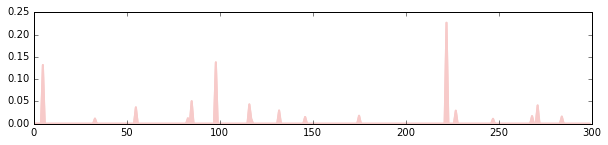


-------------------------------
(222, 0.22635626658662353)
# words from the texts in this topic
very goes here experience more hold this meet coming things over before them little care days thing that take which help going ones many will does being like success people everything about road into your there true picture younger time
# words from the LDA topic:
to you love and my it for is your me life girl man skipper with all little that night be one time we heart at this good out big day way up get woman are from like dead can lady home baby last no girls don women will dance how
-------------------------------
(98, 0.13762826475553092)
# words from the texts in this topic
what never makes work give want feedback keep another than also significant cheap where behind come taking voice just knock down inspirer
# words from the LDA topic:
billboard chart hot mix guitares dance down what paroles allmusic want rolling come never grammy got roll vinyle figurera just youtube disco hey sweet 

In [101]:
analysis(0)

### text #1: joined-P6608-J1-2-3-fr-en-T.mxliff

This text correponds to the General Terms and Conditions for an issurance company.

The first topic correpsond to the vocabulary related to the working world/ business world/management.
The second topic correspond to the vocabulary related to law vocabulary.
The third topic correspond to the vocabulary related to the business word/finance world.

We could expect that the first topic is the "law" topic instead of the topic #116 because this text is about terms and conditions.
However, the topic #116 (working world/ business world/management) is quite general and group vocabulary specific to formal/professionnal texts. Moreover, the whole corpus that the topic #116 is very often "activated". Therefore, the whole distribution of a document have to be taken in account in order to understand the content of the text and not only a first topic.

Then, this topic distribution seems to represent quite well the content of this document.

proof_texts/201508_CGV Bibelib_V2-fr-en-T.mxliff


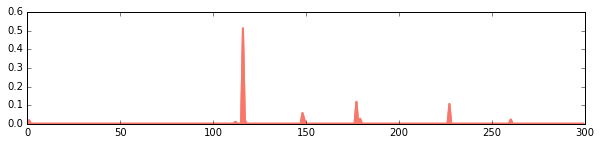


-------------------------------
(116, 0.51292767065739231)
# words from the texts in this topic
bénéficier assistance prestataire garantie garantir indemnisation recueillir avis mettre impôt agir expressément responsabilité bénéficiaire alinéa assurer obligation amélioration créance exercer améliorer répondre ayants litige prétendre gestion exercice veiller informer respecter surveillance cotisation médiateur délai régir réglementation notification entreprendre satisfaire limitation fraude cadre remplir préalable offrir préjudice aide décider compétence apporter
# words from the LDA topic:
association loi développement organisation gestion droit organisme services sécurité projet travail entreprises conseil membres santé européenne environnement information public service ministère sociale personnes formation protection activités économique commission recherche projets cadre publique programme ressources associations mise publics durable niveau but chaque réseau peuvent droits article

In [102]:
analysis(1)

### text #2: joined-P6608-J1-2-3-fr-en-T.mxliff

This is a short internal message in a company related to management.

The topic #116 alone correspond quite well to this text. 

However, this text is very short, so it is difficult to have more accurate results.

proof_texts/676cb091f3e0d4ddb3531b916edb919cDemande_1 - DIAWARA Fousseny-fr-en-T.mxliff


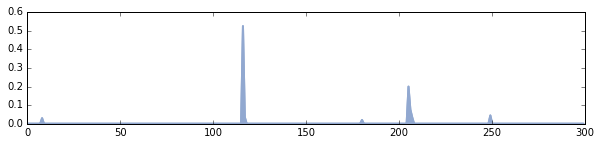


-------------------------------
(116, 0.52018997920166909)
# words from the texts in this topic
respecter mettre gouvernance cadre
# words from the LDA topic:
association loi développement organisation gestion droit organisme services sécurité projet travail entreprises conseil membres santé européenne environnement information public service ministère sociale personnes formation protection activités économique commission recherche projets cadre publique programme ressources associations mise publics durable niveau but chaque réseau peuvent droits article création objectif système cas objectifs
-------------------------------
(205, 0.18760625824768892)
# words from the texts in this topic
rester
# words from the LDA topic:
personnage fiction personnages jeune série roman épisode femme père mère va quand fille résumé si docteur film chez décide découvre héros car ami afin tuer dernier scène veut jour science toujours apprend vous jamais enfants terre synopsis amis enfant je doit dit ce

In [103]:
analysis(2)

### text #3: joined-P6608-J1-2-3-fr-en-T.mxliff

This is a declaration/request related to a lawsuit.

The two most important topics are the topic #116 (business word/organistion) and the topic #177 (legal/ law vocabulary).

Here, the topics distribution is very relevant given that we have a large proportion for the topic #177 which corresponds exactly to this kind of document.

proof_texts/conclusions Appel 2-fr-en-T.mxliff


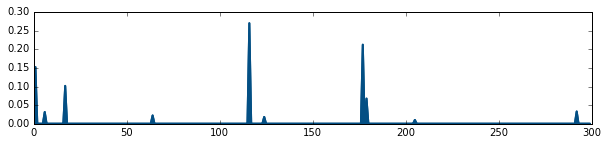


-------------------------------
(116, 0.27035546429881335)
# words from the texts in this topic
limiter fonctionnement encadrer législateur permettre mettre recours assurer octroyer planification emploi contribuer fournir délai cadre droit satisfaire soutenir conduire apporter assurance défendeur litige encourager informer surveillance besoin instituer remplir matière recommandation applicable public audit dossier entreprendre constituer conformer conformément exercer évaluation harmonisation exiger adopter trancher améliorer répondre baser veiller promouvoir
# words from the LDA topic:
association loi développement organisation gestion droit organisme services sécurité projet travail entreprises conseil membres santé européenne environnement information public service ministère sociale personnes formation protection activités économique commission recherche projets cadre publique programme ressources associations mise publics durable niveau but chaque réseau peuvent droits article cr

In [104]:
analysis(3)

### text #4: joined-P6608-J1-2-3-fr-en-T.mxliff

It seems to be an essay related to Virtual Reality. It talks about the sentiment of "presence" in virtual worlds.

The most important topics are the topic #117 (25%): the vocabulary related to the web/digital.
Then we have topic related to phisolosophy/sociology (%25).

These topics discriebe exactly the content of this text. 

proof_texts/f541765a457135988193cb366c994244New revision-fr-en-T.mxliff


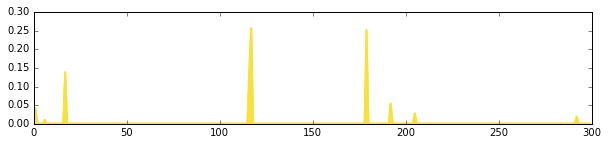


-------------------------------
(117, 0.25651538359251536)
# words from the texts in this topic
fourni utilisateur facilement afficher internaute partager fonctionner gérer lecteur utilisation tester modifier information discussion manipuler facile séparément mail possibilité identifier créer message contenu permettre envoyer manipulation hypertexte simultanément informatique internautes ordinateur interface graphique multi audio choisir générer communiquer fournir technologie asynchrone virtuel communication support logiciel interactivité application utiliser
# words from the LDA topic:
logiciel données web informatique windows internet système utilisateurs logiciels version microsoft linux fichiers wikipédia utilisateur permet android google css ordinateur interface code applications réseau http systèmes libre licence numérique serveur langage application fonctionnalités projet gestion format programmation apple gnu base information utilisé ios mémoire ligne permettant exemple dispo

In [105]:
analysis(4)

### Analysis #5: joined-P6608-J1-2-3-fr-en-T.mxliff

This text is the content of a website about creating personnal website. 

Here the first topic is the "web" topic, so it is closely related.

proof_texts/f9bc7e980ad4039772ecb698407bd1a5website NL-fr-en-T.mxliff


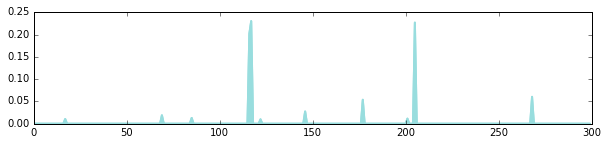


-------------------------------
(117, 0.22989337651064062)
# words from the texts in this topic
utilisateur afficher correct partager courriel cookies access supprimer gérer modifier confidentialité information accéder personnaliser communication mail possibilité requête internet message envoyer effectuer clic choisir connecter générer disponible informatique email affichage gestionnaire adresse gratuit envoi contenir communiquer fournir disponibilité support utiliser
# words from the LDA topic:
logiciel données web informatique windows internet système utilisateurs logiciels version microsoft linux fichiers wikipédia utilisateur permet android google css ordinateur interface code applications réseau http systèmes libre licence numérique serveur langage application fonctionnalités projet gestion format programmation apple gnu base information utilisé ios mémoire ligne permettant exemple disponible os open
-------------------------------
(205, 0.22657587565824516)
# words from the text

In [106]:
analysis(5)

### text #6: joined-P6608-J1-2-3-fr-en-T.mxliff

This is about the rules of a game.

The first topic: #205 is related to the vocabulary of fiction/game/narration.

The second topic is the law/legal vocabulary.

Here, the topic ditribution reflects wuite well the content of the text.

proof_texts/joined-P5537-J1-2-fr-en-T.mxliff


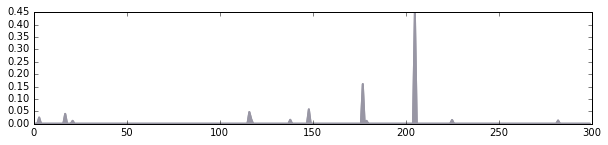


-------------------------------
(205, 0.44372354625050003)
# words from the texts in this topic
déjà échapper apparemment aider magique revenir imaginer apprendre meurtrier révéler étrange devenir appeler approcher commencer terrible posséder venger entrer arrivé découvrir annoncer chaos sauver cacher passer prendre véritable personnage errer réparer disparaître piéger horrible tenter bête quitter ramener revivre lorsqu espère arriver épargner moment transformer retrouver regarder rencontrer laisser jamais
# words from the LDA topic:
personnage fiction personnages jeune série roman épisode femme père mère va quand fille résumé si docteur film chez décide découvre héros car ami afin tuer dernier scène veut jour science toujours apprend vous jamais enfants terre synopsis amis enfant je doit dit cela version tard petit lorsque aide jeu planète
-------------------------------
(177, 0.15889471914805292)
# words from the texts in this topic
procès régler peine droit fanatique assister accus

In [107]:
analysis(6)

### text #7: joined-P6608-J1-2-3-fr-en-T.mxliff

This is an article about an artist and his work.

The third one topics: #205 (fiction/narration), #69 (arts/museum) and #179 (philosophie/sociologie) conserpond to the text.

proof_texts/joined-P6608-J1-2-3-fr-en-T.mxliff


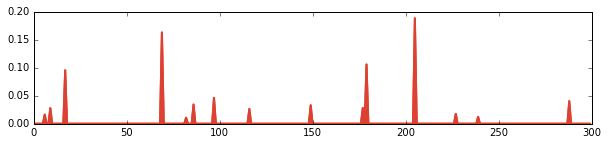


-------------------------------
(205, 0.18913701738438188)
# words from the texts in this topic
aider continuer apprendre approcher commencer calme découvrir rencontrer quelque mêler révéler charisme incarner raconter précieusement paisible garçon prestance apparence moment laisser ouvrir quête mystérieux
# words from the LDA topic:
personnage fiction personnages jeune série roman épisode femme père mère va quand fille résumé si docteur film chez décide découvre héros car ami afin tuer dernier scène veut jour science toujours apprend vous jamais enfants terre synopsis amis enfant je doit dit cela version tard petit lorsque aide jeu planète
-------------------------------
(69, 0.16371846689838432)
# words from the texts in this topic
design collection musée faïencerie galerie créatif contemporain modernité exposer exposition reflet
# words from the LDA topic:
musée art exposition photographe galerie expositions contemporain arts collections artiste artistes collection museum musées pho

In [108]:
analysis(7)

### text #8: joined-P6608-J1-2-3-fr-en-T.mxliff

This text is about a contest for professional drivers. It explains how the contest is organized and what the participants can win.

The first topic is the topic #116 (company worl/professional world). It makes sense since this text is a bout a contest for professional drivers.
The second topic #186 is related to the transportation systems. Given that this contest aims professional drivers, it makes sense.

proof_texts/joined-P6949-J1-2-3-4-5-6-7-8-9-10-11-12-13-fr-en-T.mxliff


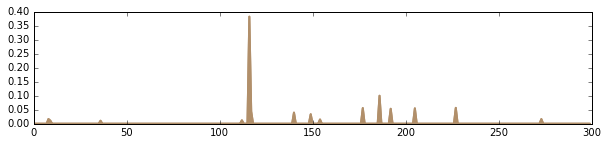


-------------------------------
(116, 0.38401303358862821)
# words from the texts in this topic
sécurité initier bénéficier axer développement public technopôle accompagner satisfaire encadrer salarié garantir emploi objectif mobilité information conduire gestion conformité mieux réduire mettre apporter responsabilité assurance assurer permettre exiger usager priorité entreprendre transdev baser renforcer favoriser législation constituer respect respecter métier proposer réglementation cadre véhiculer offrir répondre
# words from the LDA topic:
association loi développement organisation gestion droit organisme services sécurité projet travail entreprises conseil membres santé européenne environnement information public service ministère sociale personnes formation protection activités économique commission recherche projets cadre publique programme ressources associations mise publics durable niveau but chaque réseau peuvent droits article création objectif système cas objectifs
-----

In [109]:
analysis(8)

### text #9: joined-P6608-J1-2-3-fr-en-T.mxliff

This is a presentation website of a company.

The topics are #116 and #227 (professional/company world vocabulary) and the topic #117 (web vocabulary).

proof_texts/textes Régie-fr-en-T.mxliff


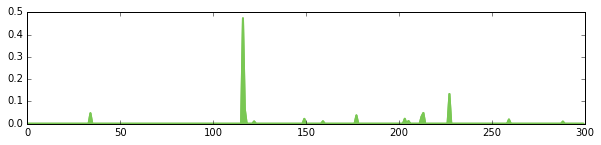


-------------------------------
(116, 0.47281738177327826)
# words from the texts in this topic
fonctionnement comptable public pérennité clientèle mettre axer apporter assurer orienter régir entreprendre renforcement gestion apprentissage emploi adéquation respecter métier répartir institutionnel demande besoin délai offrir répondre renforcer décider expertise
# words from the LDA topic:
association loi développement organisation gestion droit organisme services sécurité projet travail entreprises conseil membres santé européenne environnement information public service ministère sociale personnes formation protection activités économique commission recherche projets cadre publique programme ressources associations mise publics durable niveau but chaque réseau peuvent droits article création objectif système cas objectifs
-------------------------------
(227, 0.1334252591608503)
# words from the texts in this topic
incontournable croissance vente million management acquisition spécia

In [110]:
analysis(9)

## Top topics 

In this section are displayed the most important topics in the corpus.
Keep in mind that each word in the topics are associated to a probability coefficient.
Therefore:
* A word can belong to several topic and a sigle word cannot descriebe a topic
* This is the whole set of words in a document which gives the final distribution. In other words, a word taken alone doesn't make sense
* here we display only few words for each topics. It is more interesting to see which words are spoted in each texts (see the previous section)

In [120]:
pairs = []
for i in range(300):
    pairs.append( (i, distrib[i]) )
    
ind = 1
for p in sorted( pairs, key = lambda p: p[1] , reverse = True)[:3]:
    print
    print "--------------------------------------------------------"
    print "|\t#" + str(ind)
    print "|\ttopic: " + str(p[0])
    print "|\tproportion: " + str( 100 * float(p[1])/float(len(proof_files)) ) + "%"
    print "--------------------------------------------------------"
    print "|\twords in the topic:"
    utilities.show_topic( p[0] , lda , 300 )
    #utilities.wordcloud_topic( p[0], lda )
    #plt.show()
    print
    print "|\ttexts with highest scores in this topic:"
    topic = p[0]
    text_in_topic = []
    for f in raw_vecs.keys():
        vec = raw_vecs[f]
        for v in vec:
            if v[0] == topic:
                text_in_topic.append( (f , v[1]) )
    for k in sorted( text_in_topic , key = lambda v:v[1], reverse = True)[:3]:
        print unicode(k[0]) + u" : " + unicode(k[1])
    print
    ind += 1


--------------------------------------------------------
|	#1
|	topic: 116
|	proportion: 4.72905378826%
--------------------------------------------------------
|	words in the topic:
association loi développement organisation gestion droit organisme services sécurité projet travail entreprises conseil membres santé européenne environnement information public service ministère sociale personnes formation protection activités économique commission recherche projets cadre publique programme ressources associations mise publics durable niveau but chaque réseau peuvent droits article création objectif système cas objectifs social domaine afin organisations actions agence évaluation nationale professionnels union qualité compétences communication économie emploi ensemble organismes code comité éducation administration missions doit action publiques aide contrôle mission commerce financement matière assurance juridique activité conditions management exemple sociaux générale institutions fonc

## Corpus Analysis

In this section, we anaylize the whole corpus and focus on the similarities and the distribution of the texts in the topics space.

### Distribution

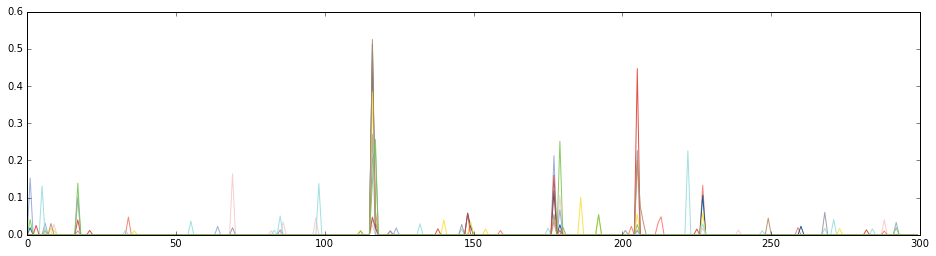

In [113]:
plt.rcParams['figure.figsize'] = (16.0, 4.0)
colors = utilities.colors
k = 0
for f in proof_texts_vecs:
    plt.plot(range(N),proof_texts_vecs[f], color= colors[k], alpha = 0.9)
    k+=1
plt.show()

the chart above represents the distribution of all the texts in the corpus.

This is quite sparse and represents well the diversity of the corpus (which is not so diversified).

### similarities

#### some code..

In [234]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import networkx as nx
import numpy as np
def f(x):
    return float(x) / 10.0

sim_lim = 0.85
vs = proof_texts_vecs
N = 300

def similarity( a, b):
    c = 0.0
    sa = np.sqrt( sum([ x*x for x in a]) )
    sb = np.sqrt( sum([ x*x for x in b]) )
    for i in range(len(a)):
        c += a[i] * b[i]
    return float(c) / ( float(sa) * float(sb))


def getGraph(sim):
    G=nx.Graph()
    labels = dict()
    k = 0
    for f in proof_files:
        G.add_node( f )
        labels[f] = k
        for ff in vs:
            if ff != f:
                s = similarity( vs[f], vs[ff])
                if s > sim:
                    G.add_edge(f,ff)
        k +=1
    return G

In [243]:
def printGraph(sim):
    print("------------------------------------------------------------------------------------")
    print('similarity threshold: ' + str(sim) )
    G = getGraph( sim)
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,
                           node_color = colors,
                           node_size=600,
                       alpha=0.8)
    nx.draw_networkx_labels(G,pos,labels,font_size=16)
    nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.8)
    plt.axis('off')
    plt.show()


#### results:

Bellow are displayed similarity networks for the 10 texts with different similarity thresholds.
If the similarity between two text is higher than the threshold, then the documents are connected.
similarity = 1 implies that document are the same.
similarity = 0 implies that document are very different.

------------------------------------------------------------------------------------
similarity threshold: 0.6


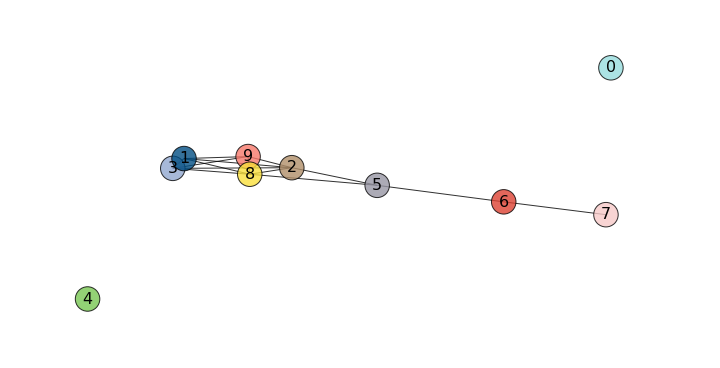

------------------------------------------------------------------------------------
similarity threshold: 0.7


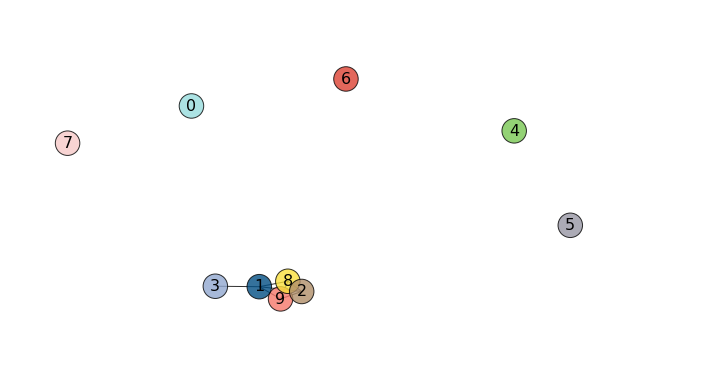

------------------------------------------------------------------------------------
similarity threshold: 0.8


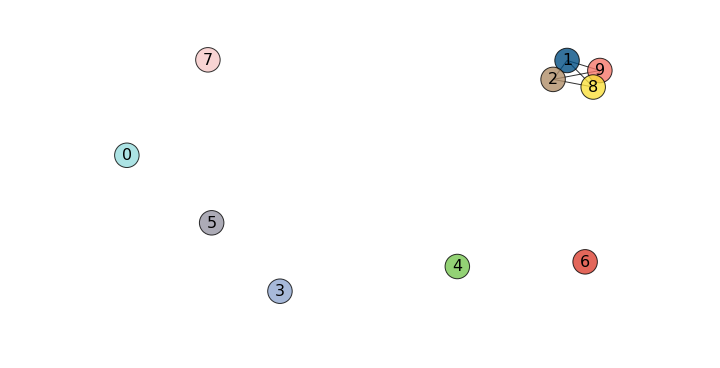

------------------------------------------------------------------------------------
similarity threshold: 0.9


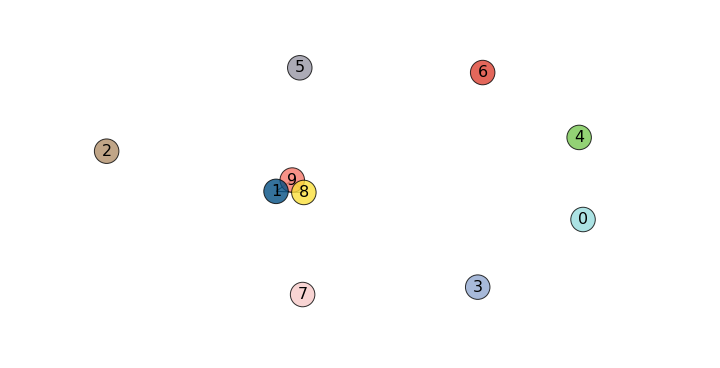

------------------------------------------------------------------------------------
similarity threshold: 0.95


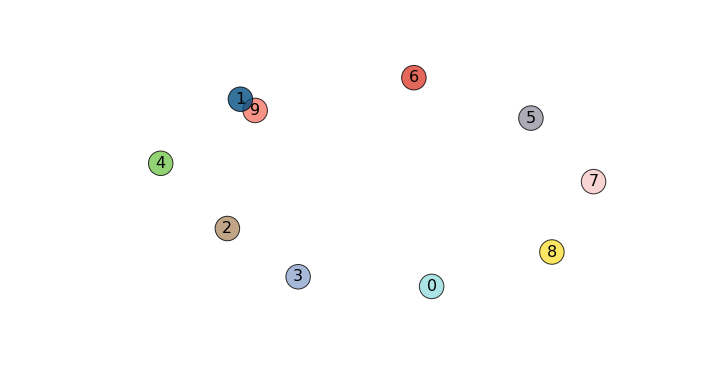

In [242]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
sims = [0.60, 0.7, 0.8, 0.9, 0.95]
for s in sims:
    printGraph(s)

#### names and indexes:

In [226]:
k = 0
for f in proof_files:
    print( "index: " + str(k) + " \t file: " + f )
    k +=1

index: 0 	 file: 20 Benefits You Get When You Start Taking Employee Feedback Seriously-fr-en-T.mxliff
index: 1 	 file: 201508_CGV Bibelib_V2-fr-en-T.mxliff
index: 2 	 file: 676cb091f3e0d4ddb3531b916edb919cDemande_1 - DIAWARA Fousseny-fr-en-T.mxliff
index: 3 	 file: conclusions Appel 2-fr-en-T.mxliff
index: 4 	 file: f541765a457135988193cb366c994244New revision-fr-en-T.mxliff
index: 5 	 file: f9bc7e980ad4039772ecb698407bd1a5website NL-fr-en-T.mxliff
index: 6 	 file: joined-P5537-J1-2-fr-en-T.mxliff
index: 7 	 file: joined-P6608-J1-2-3-fr-en-T.mxliff
index: 8 	 file: joined-P6949-J1-2-3-4-5-6-7-8-9-10-11-12-13-fr-en-T.mxliff
index: 9 	 file: textes Régie-fr-en-T.mxliff
